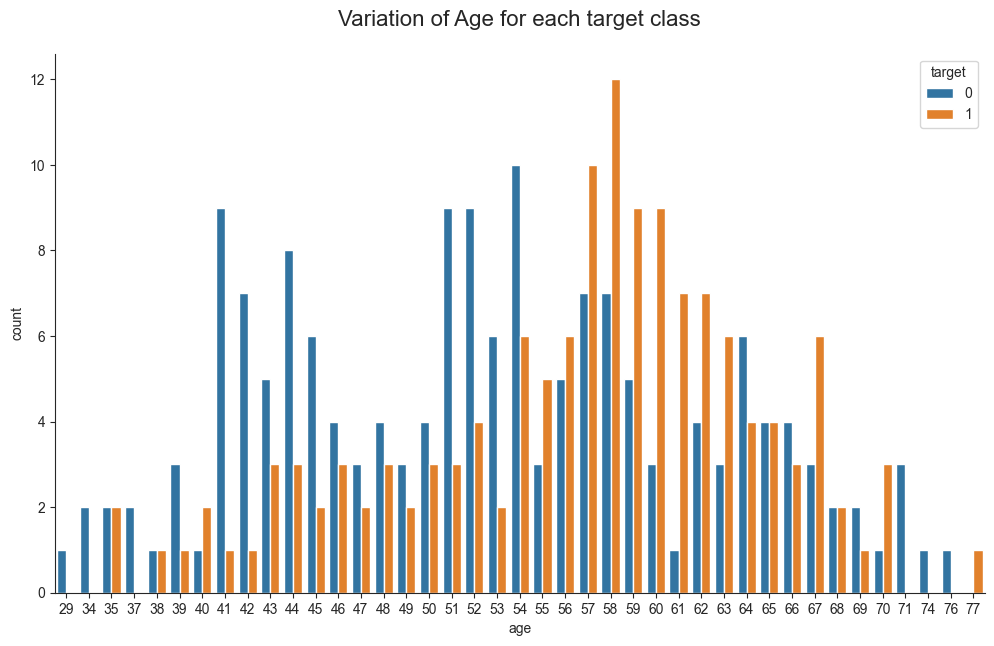

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0:0, 1:1, 2:1, 3:1, 4:1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

df_yes = df[df['target'] == 1]
df_no = df[df['target'] == 0]
sns.set_style("ticks")
# Create a figure
plt.figure(figsize=(12, 7))

# The main plotting function
sns.countplot(x='age', hue='target', data=df)

# --- 3. Customize the Plot ---
# Add the title
plt.title('Variation of Age for each target class', fontsize=16, pad=20)

# Remove the top and right borders
sns.despine()

# Display the plot
plt.show()

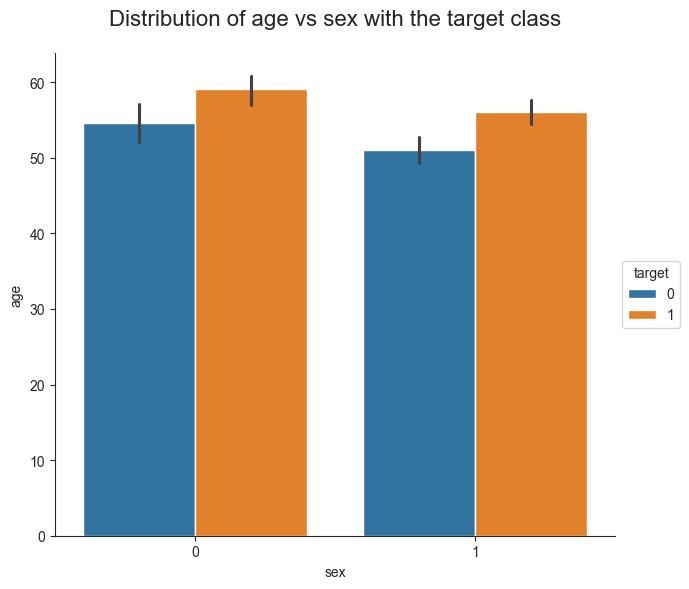

In [30]:
# Set the visual style to match (no grid, ticks on axes)
sns.set_style("ticks")

# Create a figure
plt.figure(figsize=(7, 6))

# The main plotting function
# It automatically calculates the average 'age' and draws error bars
ax = sns.barplot(
    data=df,
    x='sex',             # x-axis: 'sex' (0, 1)
    y='age',             # y-axis: 'age' (will be averaged)
    hue='target'         # Grouping: 'target' (0, 1)
)

# --- 3. Customize the Plot ---
# Add the title
plt.title('Distribution of age vs sex with the target class', 
          fontsize=16, pad=20)

# Move the legend
sns.move_legend(ax, "center left", bbox_to_anchor=(1, 0.5))

# Remove the top and right borders
sns.despine()

# Ensure layout is clean
plt.tight_layout()

# Display the plot
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="uniform",
    algorithm="auto",
    leaf_size=30,
    p=2,
    metric="minkowski",
)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print("Cm_test: ", cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(
    "Accuracy for training set for KNeighborsClassifier = {}".format(accuracy_for_train)
)
print("Accuracy for test set for KneighborsClassifier = {}".format(accuracy_for_test))

Cm_test:  [[22  7]
 [12 20]]

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KneighborsClassifier = 0.69


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

svm = SVC(
    kernel="rbf",
    random_state=42
)

svm.fit(X_train, y_train)
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print("Cm_test: ", cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(
    "Accuracy for training set for KNeighborsClassifier = {}".format(accuracy_for_train)
)
print("Accuracy for test set for KneighborsClassifier = {}".format(accuracy_for_test))

Cm_test:  [[26  3]
 [17 15]]

Accuracy for training set for KNeighborsClassifier = 0.66
Accuracy for test set for KneighborsClassifier = 0.67


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print("Cm_test: ", cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(
    "Accuracy for training set for KNeighborsClassifier = {}".format(accuracy_for_train)
)
print("Accuracy for test set for KneighborsClassifier = {}".format(accuracy_for_test))

Cm_test:  [[26  3]
 [ 7 25]]

Accuracy for training set for KNeighborsClassifier = 0.85
Accuracy for test set for KneighborsClassifier = 0.84


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt = DecisionTreeClassifier(
    criterion="gini",
    max_depth=10,
    min_samples_split=2
)
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print("Cm_test: ", cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(
    "Accuracy for training set for KNeighborsClassifier = {}".format(accuracy_for_train)
)
print("Accuracy for test set for KneighborsClassifier = {}".format(accuracy_for_test))

Cm_test:  [[22  7]
 [ 9 23]]

Accuracy for training set for KNeighborsClassifier = 1.0
Accuracy for test set for KneighborsClassifier = 0.74


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(
    n_estimators=10,
    criterion="gini",
    max_depth=10,
    min_samples_split=2,
    random_state=42,
)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print("Cm_test: ", cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(
    "Accuracy for training set for KNeighborsClassifier = {}".format(accuracy_for_train)
)
print("Accuracy for test set for KneighborsClassifier = {}".format(accuracy_for_test))

Cm_test:  [[25  4]
 [ 8 24]]

Accuracy for training set for KNeighborsClassifier = 0.98
Accuracy for test set for KneighborsClassifier = 0.8


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

ada = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
)
ada.fit(X_train, y_train)

ada.fit(X_train, y_train)
y_pred_train = ada.predict(X_train)
y_pred_test = ada.predict(X_test)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print("Cm_test: ", cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(
    "Accuracy for training set for KNeighborsClassifier = {}".format(accuracy_for_train)
)
print("Accuracy for test set for KneighborsClassifier = {}".format(accuracy_for_test))

Cm_test:  [[27  2]
 [ 4 28]]

Accuracy for training set for KNeighborsClassifier = 0.88
Accuracy for test set for KneighborsClassifier = 0.9


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier


X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gra = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    subsample=1,
    min_samples_split=2,
    max_depth=3,
    random_state=42
)
gra.fit(X_train, y_train)

gra.fit(X_train, y_train)
y_pred_train = gra.predict(X_train)
y_pred_test = gra.predict(X_test)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print("Cm_test: ", cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(
    "Accuracy for training set for KNeighborsClassifier = {}".format(accuracy_for_train)
)
print("Accuracy for test set for KneighborsClassifier = {}".format(accuracy_for_test))

Cm_test:  [[25  4]
 [ 5 27]]

Accuracy for training set for KNeighborsClassifier = 1.0
Accuracy for test set for KneighborsClassifier = 0.85


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
ad = AdaBoostClassifier(random_state=42)

meta = LogisticRegression(max_iter=1000)
stack_model = StackingClassifier(
    estimators=[
        ("dt", dtc),
        ("rf", rfc),
        ("knn", knn),
        ("xgb", xgb),
        ("gb", gc),
        ("ad", ad)
    ],
    final_estimator=meta,
    cv=5,
    n_jobs=-1
)

stack_model.fit(X_train, y_train)

y_pred_train = stack_model.predict(X_train)
y_pred_test = stack_model.predict(X_test)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print("Cm_test: ", cm_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(
    "Accuracy for training set for KNeighborsClassifier = {}".format(accuracy_for_train)
)
print("Accuracy for test set for KneighborsClassifier = {}".format(accuracy_for_test))

Cm_test:  [[27  2]
 [ 5 27]]

Accuracy for training set for KNeighborsClassifier = 1.0
Accuracy for test set for KneighborsClassifier = 0.89
